<a href="https://colab.research.google.com/github/ykitaguchi77/Stable_Diffusion/blob/main/Hard-prompts-made-easy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title **Setup**

# install library & copy github code
! pip install transformers==4.23.1 sentence-transformers==2.2.2 ftfy==6.1.1 mediapy==1.1.2 diffusers==0.11.1
! git clone https://github.com/cedro3/hard-prompts-made-easy.git
%cd hard-prompts-made-easy

# import library
import torch
import open_clip
import mediapy as media
from optim_utils import *
import argparse

# load setting
args = argparse.Namespace()
args.__dict__.update(read_json("sample_config.json"))
args

# load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _, clip_preprocess = open_clip.create_model_and_transforms(args.clip_model, pretrained=args.clip_pretrain, device=device)
tokenizer = open_clip.tokenizer._tokenizer
token_embedding = model.token_embedding
preprocess = clip_preprocess

# load Diffusion model
from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline
model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.float16,
    revision="fp16",
    )
pipe = pipe.to(device)
image_length = 512


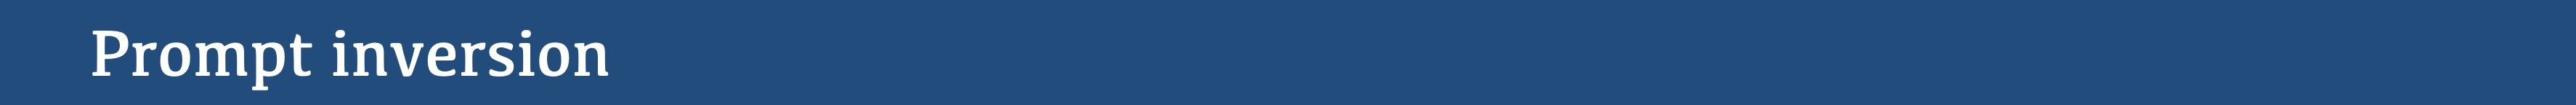

In [ ]:
#@title **Load image**
pic = '01.jpg' #@param {type:"string"}
pic_path = 'pic/'+pic
orig_images= Image.open(pic_path).resize((512, 512))
media.show_images([orig_images])

In [ ]:
#@title **Optimize Prompt**
learned_prompt = optimize_prompt(model, preprocess, args, device, target_images=[orig_images])

In [ ]:
#@title **Generate Image**
prompt = learned_prompt

num_images = 4
guidance_scale = 9
num_inference_steps = 25

images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images

print(f"prompt: {prompt}")
media.show_images(images)

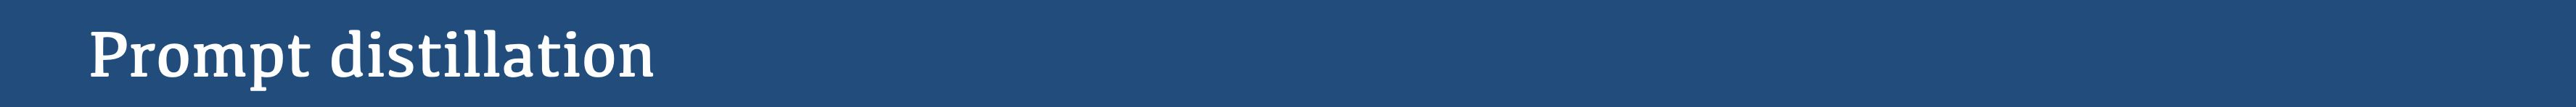

In [ ]:
#@title **Load prompt**
target_prompt = "realistic car 3 d render sci - fi car and sci - fi robotic factory structure in the coronation of napoleon painting and digital billboard with point cloud in the middle, unreal engine 5, keyshot, octane, artstation trending, ultra high detail, ultra realistic, cinematic, 8 k, 1 6 k, in style of zaha hadid, in style of nanospace michael menzelincev, in style of lee souder, in plastic, dark atmosphere, tilt shift, depth of field" #@param {type:"string"}
print(target_prompt)

In [ ]:
#@title **Generate Image**
prompt = target_prompt

num_images = 4
guidance_scale = 9
num_inference_steps = 25

images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images

print(f"prompt: {prompt}")
media.show_images(images)

In [ ]:
#@title **Optimize Prompt**
learned_prompt = optimize_prompt(model, preprocess, args, device, target_prompts=[target_prompt])

In [ ]:
#@title **Generate Image**
prompt = learned_prompt

num_images = 4
guidance_scale = 9
num_inference_steps = 25

images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images

print(f"prompt: {prompt}")
media.show_images(images)

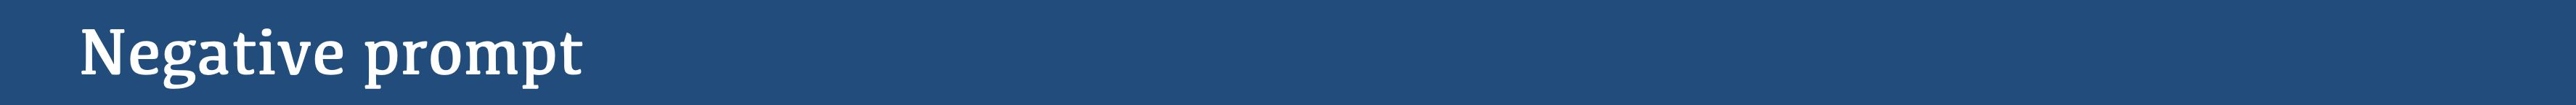

In [ ]:
#@title **Load image**
pic = '02.jpg' #@param {type:"string"}
pic_path = 'pic/'+pic
orig_images= Image.open(pic_path).resize((512, 512))
media.show_images([orig_images])

In [ ]:
#@title **Optimize Prompt**
learned_prompt = optimize_prompt(model, preprocess, args, device, target_images=[orig_images])

In [ ]:
#@title **Generate Image**
prompt = "two dogs are running" #@param {type:"string"}
negative_prompt = learned_prompt

num_images = 4
guidance_scale = 9
num_inference_steps = 25
seed = 0

print(f"prompt: {prompt}")
print(f"negative prompt: {negative_prompt}")

set_random_seed(seed)
images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images
print(f"without negative prompt:")
media.show_images(images)

set_random_seed(seed)
images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    negative_prompt=negative_prompt,
    ).images

print(f"with negative prompt:")
media.show_images(images)

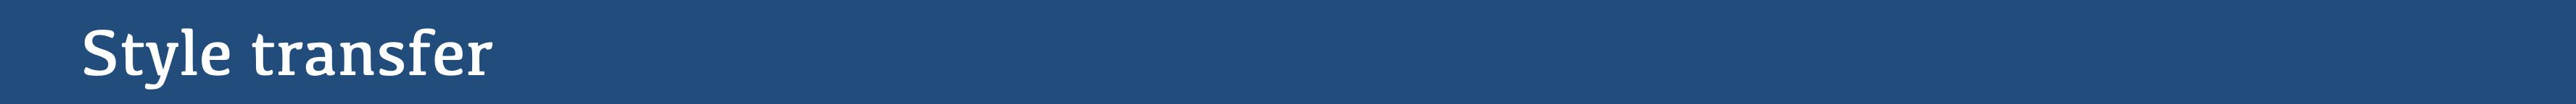

In [ ]:
#@title **Load image**
pic_list = '03.jpg', '04.jpg', '05.jpg', '06.jpg' #@param {type:"string"}
orig_images =[]
for pic in pic_list:
  pic_path ='pic/'+pic
  orig_image = Image.open(pic_path).resize((512, 512))
  orig_images.append(orig_image)
media.show_images(orig_images)

In [ ]:
#@title **Optimize Prompt**
learned_prompt = optimize_prompt(model, preprocess, args, device, target_images=orig_images)

In [ ]:
#@title **Generate Image**
main_prompt = 'the streets of Paris' #@param {type:"string"}
prompt = main_prompt + ' in the style of ' + learned_prompt


num_images = 4
guidance_scale = 9
num_inference_steps = 25

images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=guidance_scale,
    num_inference_steps=num_inference_steps,
    height=image_length,
    width=image_length,
    ).images

print(f"prompt: {prompt}")
media.show_images(images)